# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Import data

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
product_sales = pd.read_csv("product_sales.csv")
print(product_sales)

       week  sales_method  ... nb_site_visits          state
0         2         Email  ...             24        Arizona
1         6  Email + Call  ...             28         Kansas
2         5          Call  ...             26      Wisconsin
3         4         Email  ...             25        Indiana
4         3         Email  ...             28       Illinois
...     ...           ...  ...            ...            ...
14995     4          Call  ...             22   Pennsylvania
14996     5          Call  ...             27         Kansas
14997     1          Call  ...             22  West Virginia
14998     6          Call  ...             27     New Jersey
14999     5  Email + Call  ...             25       Illinois

[15000 rows x 8 columns]


# Validation

In [33]:
#Get overview about data
product_sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [34]:
product_sales.shape

(15000, 8)

## Check categorical data

In [35]:
#Check validated values in categorical data
print(product_sales['sales_method'].unique())
print(product_sales['state'].unique())
print(product_sales['week'].unique())

['Email' 'Email + Call' 'Call' 'em + call' 'email']
['Arizona' 'Kansas' 'Wisconsin' 'Indiana' 'Illinois' 'Mississippi'
 'Georgia' 'Oklahoma' 'Massachusetts' 'Missouri' 'Texas' 'New York'
 'Maryland' 'California' 'Tennessee' 'Pennsylvania' 'North Dakota'
 'Florida' 'Michigan' 'North Carolina' 'Hawaii' 'Colorado' 'Louisiana'
 'Virginia' 'New Mexico' 'Arkansas' 'Alaska' 'Oregon' 'New Hampshire'
 'Ohio' 'New Jersey' 'Connecticut' 'Iowa' 'Montana' 'Washington'
 'Kentucky' 'Alabama' 'Nebraska' 'South Carolina' 'Minnesota'
 'South Dakota' 'Delaware' 'Maine' 'Utah' 'West Virginia' 'Vermont'
 'Rhode Island' 'Nevada' 'Idaho' 'Wyoming']
[2 6 5 4 3 1]


- It is normal with "State" and "Week"
- In Sales Method, we have duplicates in "em + call" vs "Email + Call" and "email" vs "Email".

In [36]:
# Fix duplicates in Sales Method

product_sales.loc[product_sales.sales_method == 'em + call', 'sales_method'] = 'Email + Call'
product_sales.loc[product_sales.sales_method == 'email', 'sales_method'] = 'Email'

# Check sales_method column after fixing
print(product_sales['sales_method'].unique())

['Email' 'Email + Call' 'Call']


## Check missing values

In [37]:
#Expolore data type and missing values
product_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


- The data type is all right for each column. There are 15000 rows and 8 columns.
- Revenue records only 13926 non-null values, which means there are 1,074 missing values in the Revenue column => I will replace these missing values by average revenues of each sale method.

In [38]:
# calculate average revenue of each sale method.
email_avg = product_sales[product_sales['sales_method'] == 'Email']['revenue'].mean().astype('float').round(2)
both_avg = product_sales[product_sales['sales_method'] == 'Email + Call']['revenue'].mean().astype('float').round(2)
call_avg = product_sales[product_sales['sales_method'] == 'Call']['revenue'].mean().astype('float').round(2)

In [39]:
# replace NaN in revenue column by average revenue of each sale method.
product_sales.loc[product_sales['sales_method'] == 'Email', 'revenue'] = product_sales.loc[product_sales['sales_method'] == 'Email', 'revenue'].fillna(email_avg)
product_sales.loc[product_sales['sales_method'] == 'Email + Call', 'revenue'] = product_sales.loc[product_sales['sales_method'] == 'Email + Call', 'revenue'].fillna(email_avg)
product_sales.loc[product_sales['sales_method'] == 'Call', 'revenue'] = product_sales.loc[product_sales['sales_method'] == 'Call', 'revenue'].fillna(email_avg)

In [40]:
# review change after replacing
product_sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,97.13,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,97.13,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [41]:
product_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


## Check duplicate values

In [42]:
#Identify duplicate rows
duplicateRows = product_sales[product_sales.duplicated("customer_id")]

#Vew duplicate rows
duplicateRows

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


- There is no duplicated row in this data.

## Compare with description

In [43]:
# Check values in Year as customers
product_sales['years_as_customer'].value_counts().sort_index()

0     1471
1     2504
2     1987
3     1619
4     1338
5     1118
6      918
7      709
8      608
9      509
10     405
11     318
12     284
13     239
14     167
15     150
16     123
17      88
18      82
19      58
20      54
21      37
22      43
23      21
24      27
25      19
26      22
27      15
28       8
29       5
30       9
31       6
32       5
33       8
34       8
35       5
36       4
37       2
38       2
39       3
47       1
63       1
Name: years_as_customer, dtype: int64

- As the company is founded in 1984, the max number of "Years as customer" must be 40, then values more than 40 is invalid.

In [44]:
# Finding value and evaluate observations having years as customer longer than 40
product_sales[product_sales['years_as_customer'] > 39]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


- We can see that only years as customer in these two columns are invalid. So I can not find clues to fix these two values. Therefore, I will drop these two observations.

In [45]:
# Dropping rows that have years_as_customer longer than 40
product_sales.drop(product_sales[product_sales['years_as_customer'] > 39].index, axis=0, inplace=True)

# Checking to see that they've been removed
product_sales['years_as_customer'].value_counts().sort_index()

0     1471
1     2504
2     1987
3     1619
4     1338
5     1118
6      918
7      709
8      608
9      509
10     405
11     318
12     284
13     239
14     167
15     150
16     123
17      88
18      82
19      58
20      54
21      37
22      43
23      21
24      27
25      19
26      22
27      15
28       8
29       5
30       9
31       6
32       5
33       8
34       8
35       5
36       4
37       2
38       2
39       3
Name: years_as_customer, dtype: int64

## Check outliers in "nb_sold", "revenue", "nb_site_visits"

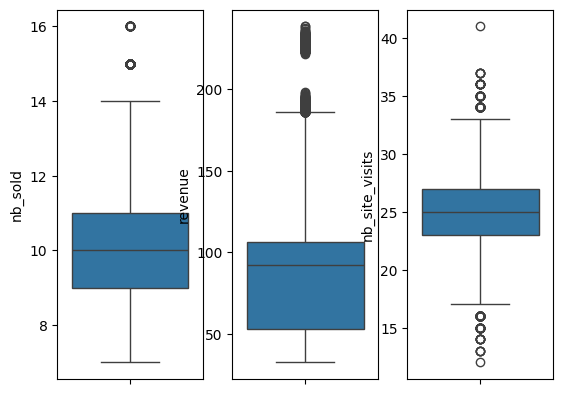

In [46]:
fig, axs = plt.subplots(ncols=3)
sns.boxplot(data = product_sales, y = "nb_sold", ax=axs[0])
sns.boxplot(data = product_sales, y = "revenue", ax=axs[1])
sns.boxplot(data = product_sales, y = "nb_site_visits", ax=axs[2])
plt.show()

- There are outliers according to interquartile range method in three attributes.
- However, we do not have enough clues to remove these outliers, then I decide to keep these values for further analysis.

## Data after validation

In [47]:
#Dataset after validation
product_sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,97.13,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,97.13,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [48]:
product_sales.shape

(14998, 8)

## Data Validation Report:
At first, there were 15000 rows and 8 columns in this dataset. Here is summary and what have changed in each column:

- *week*: Week includes 6 integers, 1-6. This matches the description, so no cleaning is needed.
- *sales_method*: 5 non-unique values with no missing values in the column. There were entries that included "em + call" and "email" which I substituted the originally given values of "Email + Call" and "Email" for respectively. After doing this,there are now only 3 options in sales_method ('Call + Email', 'Call', 'Email'), which aligns with the given description.
- *customer_id*: 15000 unique customer ids without missing values and duplicated values, it matches with description.
- *nb_sold*: numeric values without missing values and matches description.
- *revenue*: there were 1,074 missing values. They are replaced by average revenue grouped by sale methods (Email, Call, Email + Call)
- *years_as_customer*: There were 2 outliers in the years_as_customer column. Since the company is established in 1984 so those with values of 47 & 63 in this column, needed to be removed.
- *nb_site_visits*: Numeric values, no missing values, already in integer format.
- *state*: Character values without missing values, no duplicated values.

After validation, there are now 14,998 rows and 8 columns, this is due to dropping the two outliers in the "years_as_customer" column.

# Exploratory Data Analysis

## How many customers were there for each approach?

In [49]:
print(product_sales["sales_method"].value_counts())

Email           7465
Call            4961
Email + Call    2572
Name: sales_method, dtype: int64


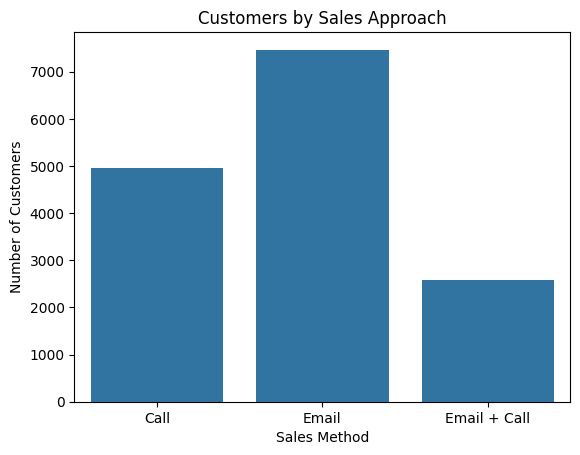

In [50]:
sns.countplot(data = product_sales, x = "sales_method", order=["Call", "Email", "Email + Call"])
plt.ylabel("Number of Customers")
plt.xlabel("Sales Method")
plt.title("Customers by Sales Approach")
plt.show()

After calculating and plot the number of customers for each sale method, we can see that:
- Email is the sale method attract biggest number of customers (7465).
- Call is in the second position among 3 method (4961).
- Email + Call attracts smallest number of customers (2572).

## What does the spread of the revenue look like overall? And for each method?

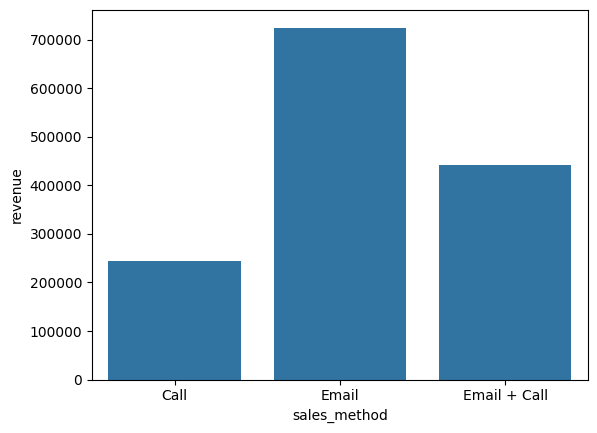

In [51]:
# Create new data group
revenue_by_method = product_sales.groupby('sales_method')['revenue'].sum().sort_values()

# Show in bar chart
sns.barplot(x = revenue_by_method.index, y = revenue_by_method, order=["Call", "Email", "Email + Call"])
plt.show()


Look at the above chart, we can see that:
- Email continues to attract the biggest revenue.
- Although, "Email + Call" is the smallest customer group, it shows better revenue compared to Call.
- In the bottom of the list is Call with smallest revenue.

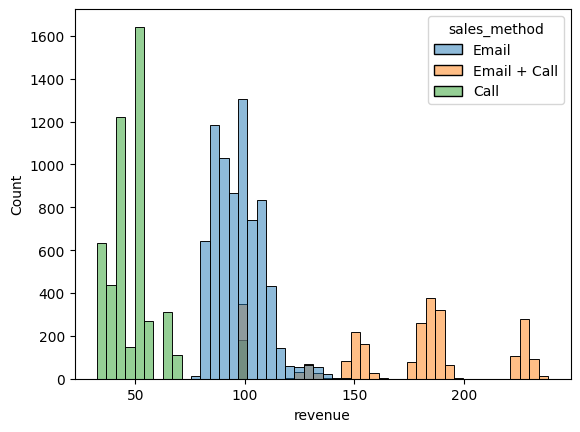

In [52]:
sns.histplot(data = product_sales, x = "revenue", hue = "sales_method")
plt.show()

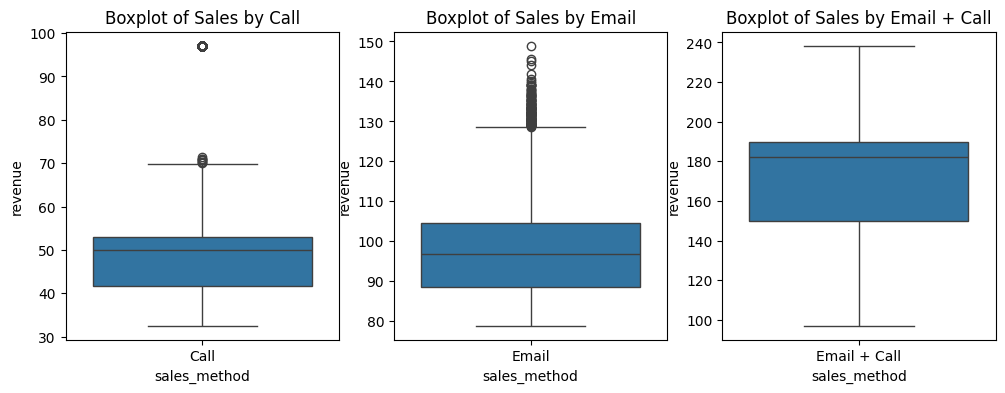

In [53]:
# Boxplots for breakdown of sales by Each Approach
fig, axes = plt.subplots(ncols=3, figsize=(12, 4))

sns.boxplot(x='sales_method', y='revenue', data=product_sales[product_sales['sales_method'] == 'Call'], ax=axes[0])
axes[0].set_title('Boxplot of Sales by Call')

sns.boxplot(x='sales_method', y='revenue', data=product_sales[product_sales['sales_method'] == 'Email'], ax=axes[1])
axes[1].set_title('Boxplot of Sales by Email')

sns.boxplot(x='sales_method', y='revenue', data=product_sales[product_sales['sales_method'] == 'Email + Call'], ax=axes[2])
axes[2].set_title('Boxplot of Sales by Email + Call')

plt.show()

We also see that:
- "Email + Call" have their revenue distributing in a higher value range (from about 100 - 240).
- Email records middle range (from about 80 - 150).
- Call records lowest range (from about 32 - 70).

This can be explained why "Email + Call" attracts smallest number of customers but still brings about revenue much more Call.

## Was there any difference in revenue over time for each of the methods?

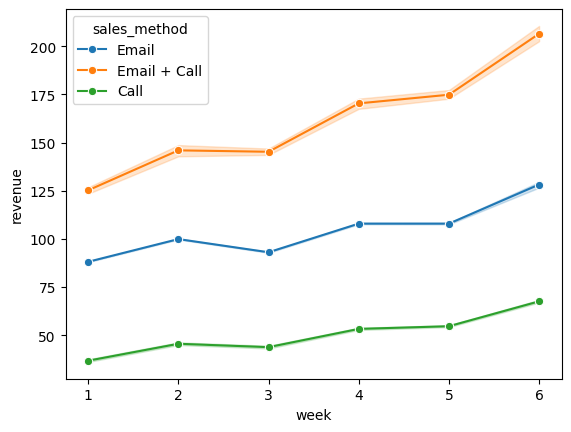

In [54]:
sns.lineplot(data=product_sales, x='week', y='revenue', hue='sales_method', marker='o')
plt.show()

Overall, all three methods have *increasing trend* in revenue over time. However, **"Email + Call"** shows the biggest magnitude of increase and highest values of revenue. Following that is **Email**, then **Call**. These lines indicates a significant difference between revenue values over time of each method.

## Based on the data, which method would you recommend we continue to use?

Based on the data and above charts, I have some recommendations for the sale method that you should use:
- **Call** method proves the weakest records in both number of customers and revenue. In addtition, this method cost much time from the sales team. So that, **it's better to focus on the other methods**.
- **Email** show the best records in both number of customers and revenue. This is also the method requires least effort from the sales team. So that, it's **can be considered for further using**. *However, the average value of each order from these method is quite low, then we have to think about the way to upgrade this method.*
- **Email + Call** shows to be the strongest method in yielding revenue. Although the number of customers agree to order after being supported by this method is small, but they buy more. This leads to the **recommendation for continuing to use this method**. *However, you also need to find out which customer group is the most suitable with this method to optimize the cost of time of the sales team.*

# Business Metrics

I recommend these metrics to keep track the business performance of these 3 sales methods' effectiveness in the future:
- Revenue for each method
- Number of products sold for each method
- Number of customers attracted by each method
- Average revenue for each method

## Revenue by method

In [55]:
product_sales.groupby('sales_method')['revenue'].sum().to_frame()

,revenue
sales_method,
Call,245093.55
Email,725059.33
Email + Call,442155.06


## Products sold by method

In [56]:
# Pivot Table of Product sold for each Sales Method across the 6 week period
product_sales.groupby(['week', 'sales_method'])['nb_sold'].agg(['sum']).unstack()

sum                    
sales_method   Call  Email Email + Call
week                                   
1              5366  24573         1281
2              7088  14942         2016
3              7456  10678         3594
4             10249  11736         5960
5             11129   8117         9817
6              5889   2583         8776

From this metric, we see another layer of sales activities through 3 methods:
- Marketing by "Email + Call" are likely to make customers buy higher value orders.
- Call is still a method that attracts large number of products sold, but the problem is the value of orders are quite low.

## Number of customers of each method

In [57]:
# Pivot Table of customer's number for each Sales Method across the 6 week period
product_sales.groupby(['week', 'sales_method'])['customer_id'].agg(['count']).unstack()

count                   
sales_method  Call Email Email + Call
week                                 
1              758  2815          148
2              805  1485          200
3              902  1150          359
4             1004  1075          495
5             1044   743          787
6              448   197          583

## Average revenue by method

In [58]:
# Pivot Table of Mean & Median for each Sales Method across the 6 week period
product_sales.groupby(['week', 'sales_method'])['revenue'].agg(['mean', 'median']).unstack()

mean                           median                      
sales_method       Call       Email Email + Call    Call    Email Email + Call
week                                                                          
1             36.817309   88.143204   125.246892  35.230   86.880      128.145
2             45.597416   99.920215   145.965000  43.520   98.830      153.625
3             43.846663   93.085383   145.227549  41.545   92.115      149.670
4             53.312600  107.948298   170.339919  51.340  107.630      180.080
5             54.704904  107.942463   174.829924  53.040  107.610      186.680
6             67.617522  128.227563   206.482710  66.070  129.870      226.790

# Summary & Recommendations

After EDA & suggesting some business metrics for this sale problem of sales team, I have some summaries and recommendation:
- Among three methods, "Call" is the weakest in both revenue and number of customers. "Email" is still the best method with highest number of customers, revenue, and lowest time consuming. "Email + Call" shows potential to be suitable with customers buy higher value orders. Therefore, **it's much better to focus on "Email" and "Email + Call" methods**.
- Overall, "Email" is the most effective with shortest time and biggest results. **The sales team can use it on a large scale, with many kinds of customers**. However, in the long term, **investing in "Call + Email" may lead to excellent sales performance, as it brings about very competitive revenue, especially when they have competitors in the market**.
- Sales team can continue with "Email" and "Email + Call" methods for their further activities with better results. However, they may **need more observations with these two methods to gain deeper insights about these two**. Furthermore, they can learn from data that which customer segments are the most suitable for which method. For example, "Email + Call" method may suitable with customers who like buying high-end products.
- Finally, **the sales team should use 4 metrics I have proposed for future observation** of these three methods. By comparing these weekly, they can easily spark the differences and follow the trend of each method to adapt quickly with the customers as well as the market.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation